# **Data Analytics I - Clustering Project**
## Football Data Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Clustering Project - Data Analytics/football_data.csv'

## Importing required Libraries

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from sklearn.metrics.pairwise import euclidean_distances
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
%matplotlib inline

## Loading the Dataset

In [ ]:
dataset = pd.read_csv(path)

##Task 1 : Data visualization

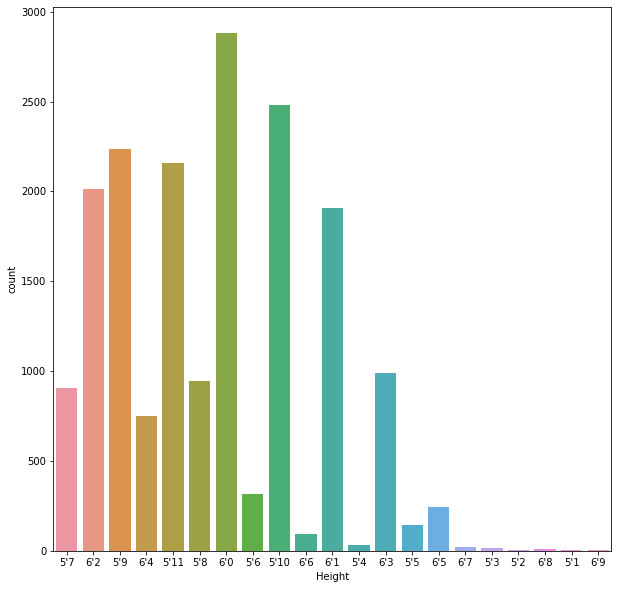

In [ ]:
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Height', data = dataset, ax=ax) 

Text(0, 0.5, 'Position')

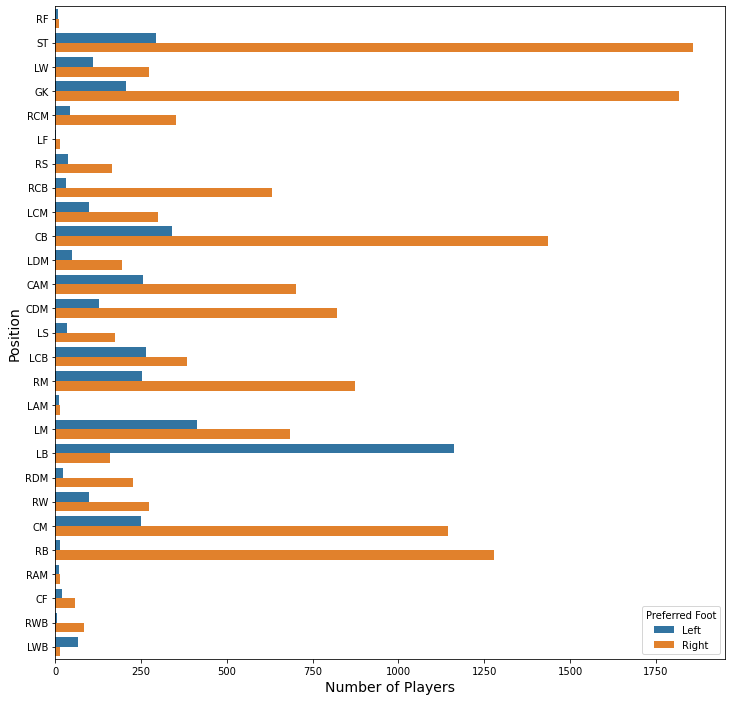

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(y="Position", hue="Preferred Foot", data=dataset)
plt.xlabel("Number of Players", size=14)
plt.ylabel("Position", size=14)

Text(0.5, 0, 'Country')

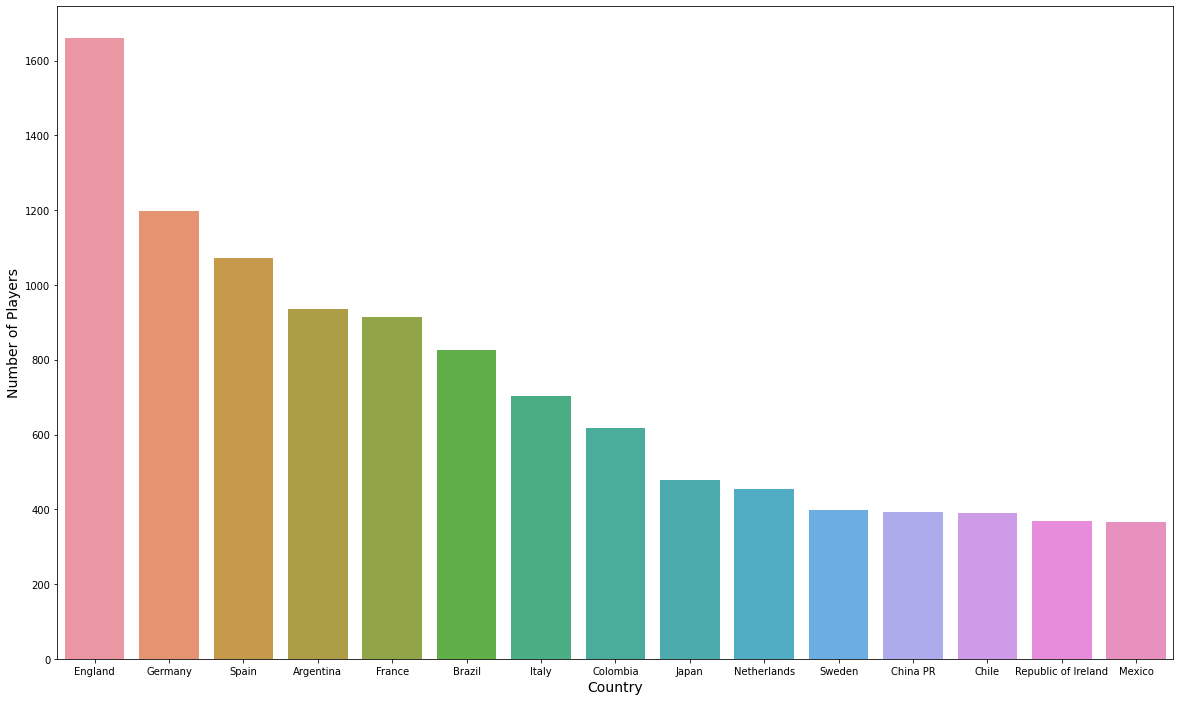

In [ ]:
country_count = dataset['Nationality'].value_counts().rename_axis('Nationality').reset_index(name='frequency')
country_count.head(20)

plt.figure(figsize=(20, 12))
sns.barplot(x="Nationality", y="frequency", data=country_count.head(15))
plt.ylabel("Number of Players", size=14)
plt.xlabel("Country", size=14)

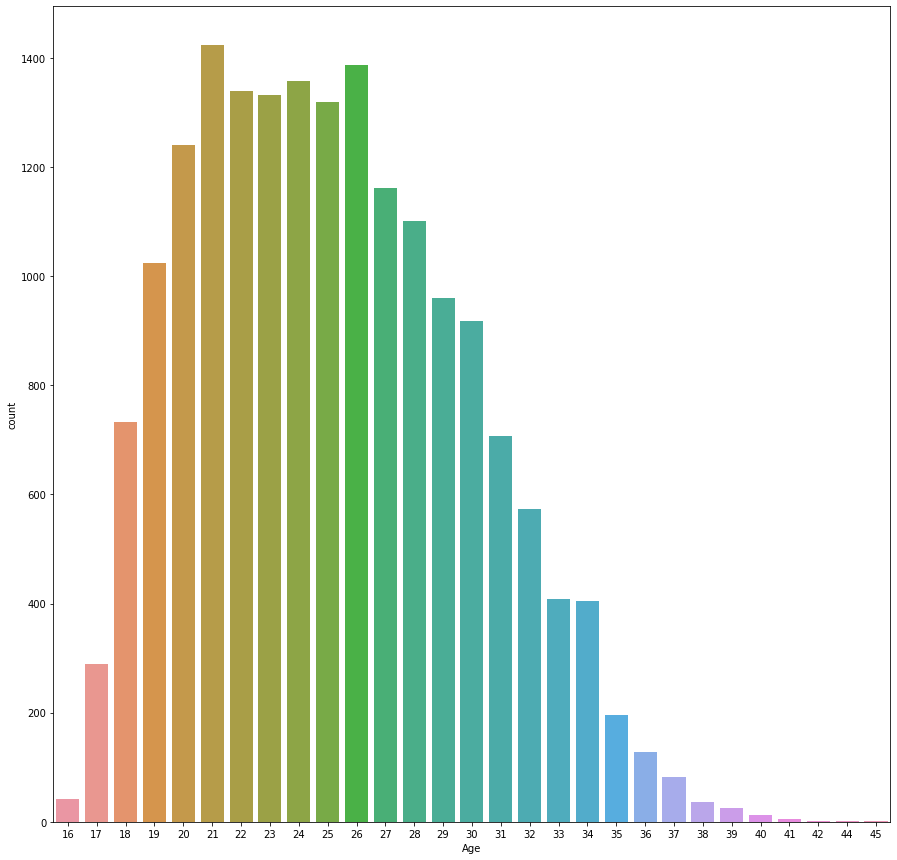

In [ ]:
fig_dims = (15, 15) #Histograms of count of players on the basis of age.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Age', data = dataset, ax=ax)

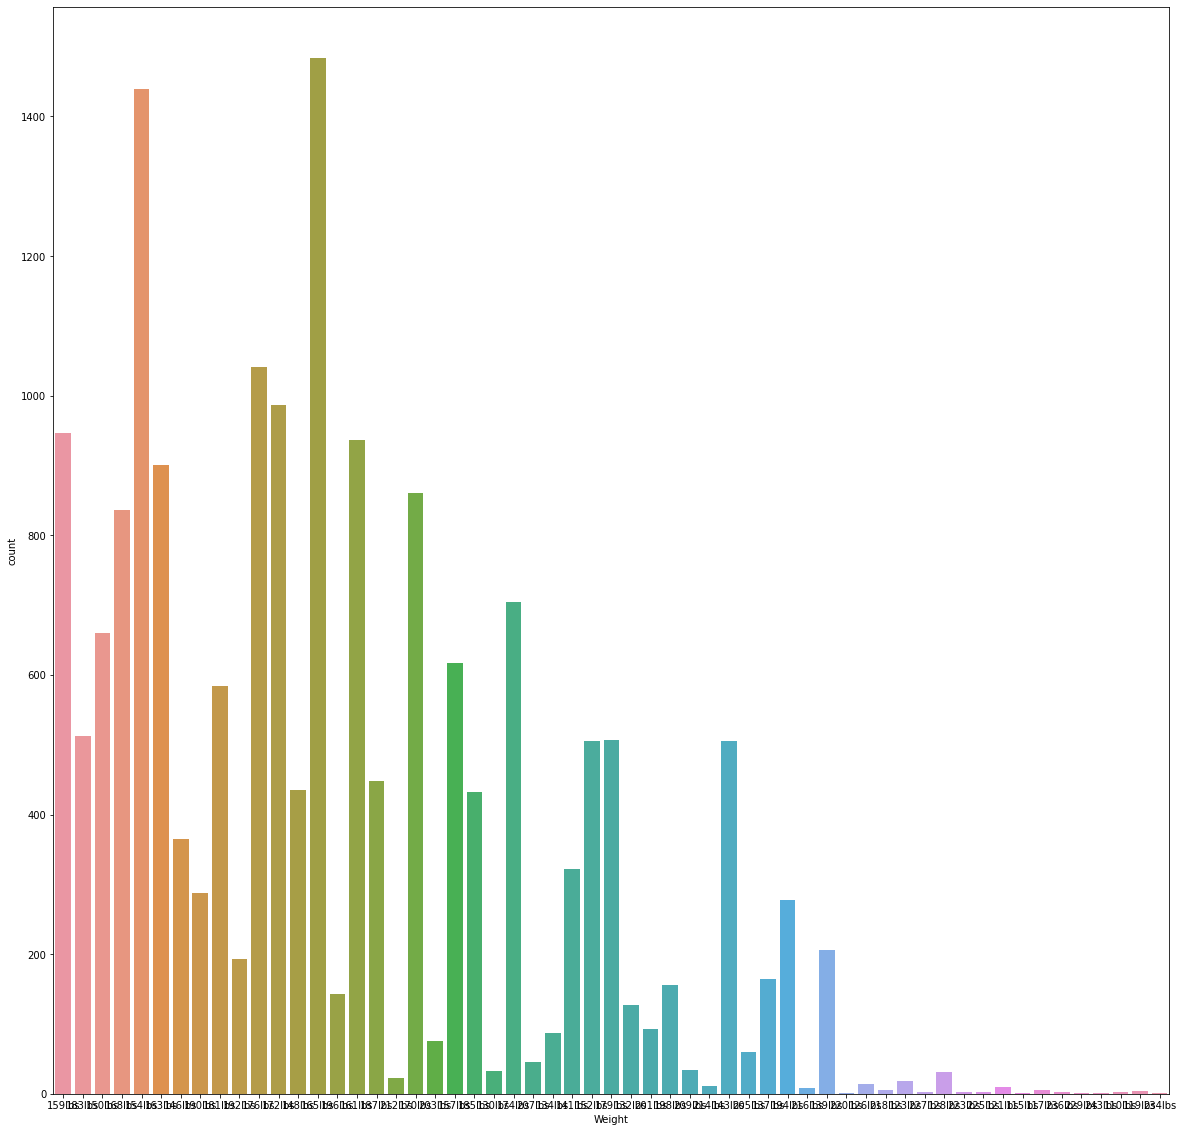

In [ ]:
fig_dims = (20, 20) #Histograms of count of players on the basis of weight.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Weight', data = dataset, ax=ax) 

Text(0, 0.5, 'Frequency')

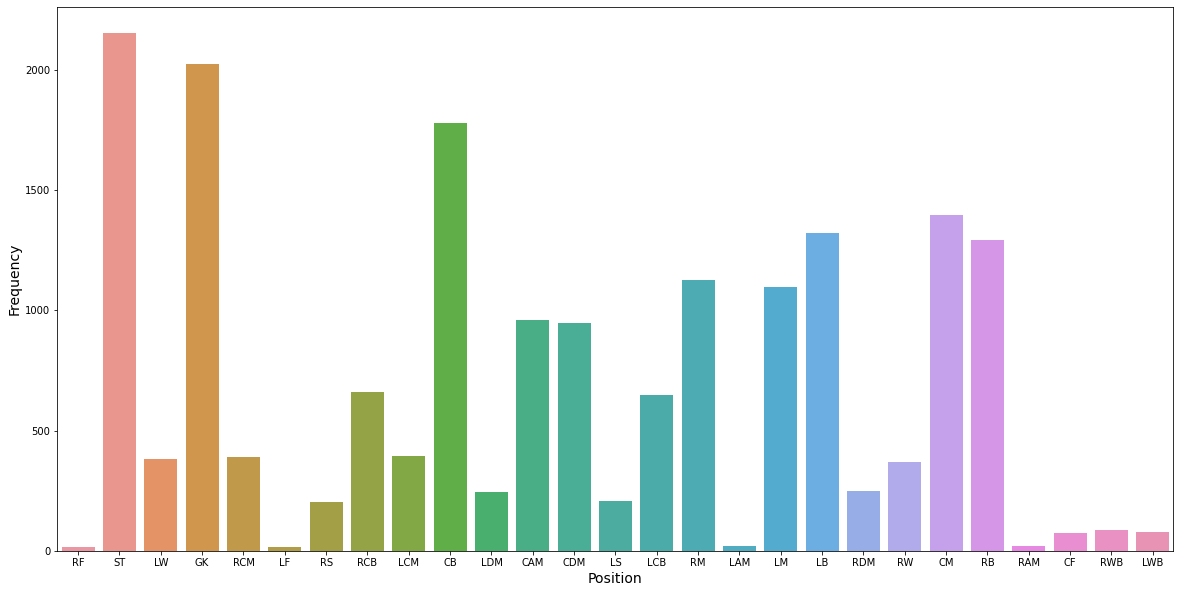

In [ ]:
fig_dims = (20, 10) #Histograms of count of players on the Position
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data = dataset, ax=ax) 
plt.xlabel("Position", size=14)
plt.ylabel("Frequency", size=14)

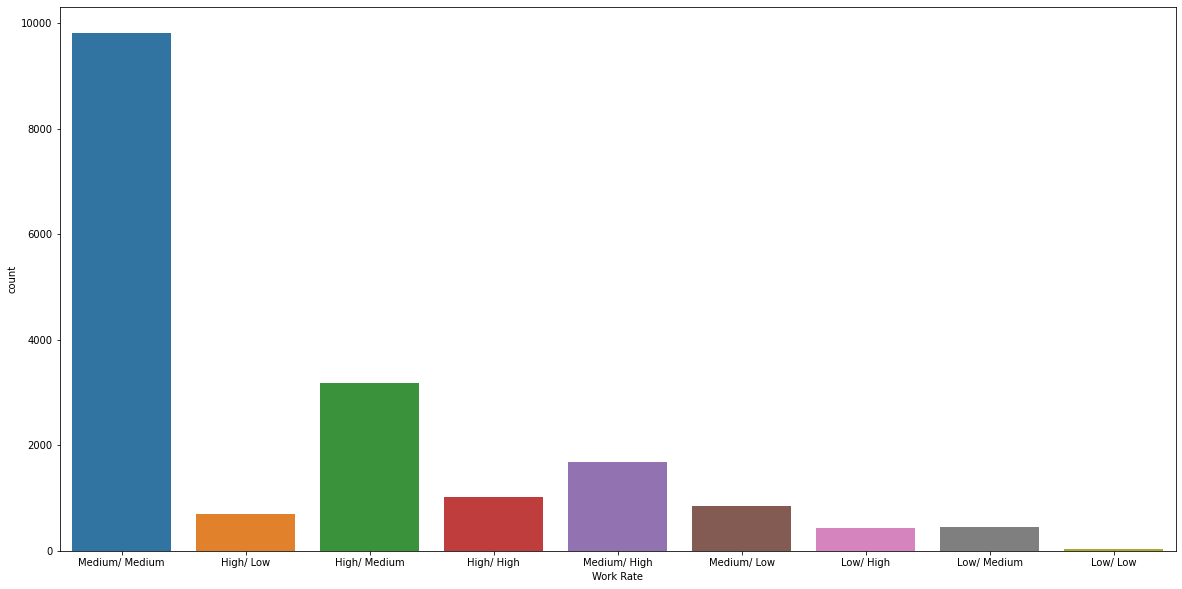

In [ ]:
fig_dims = (20, 10) #Histograms of count of players vs Work Rate
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Work Rate', data = dataset, ax=ax) 

In [ ]:
dataset

Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]

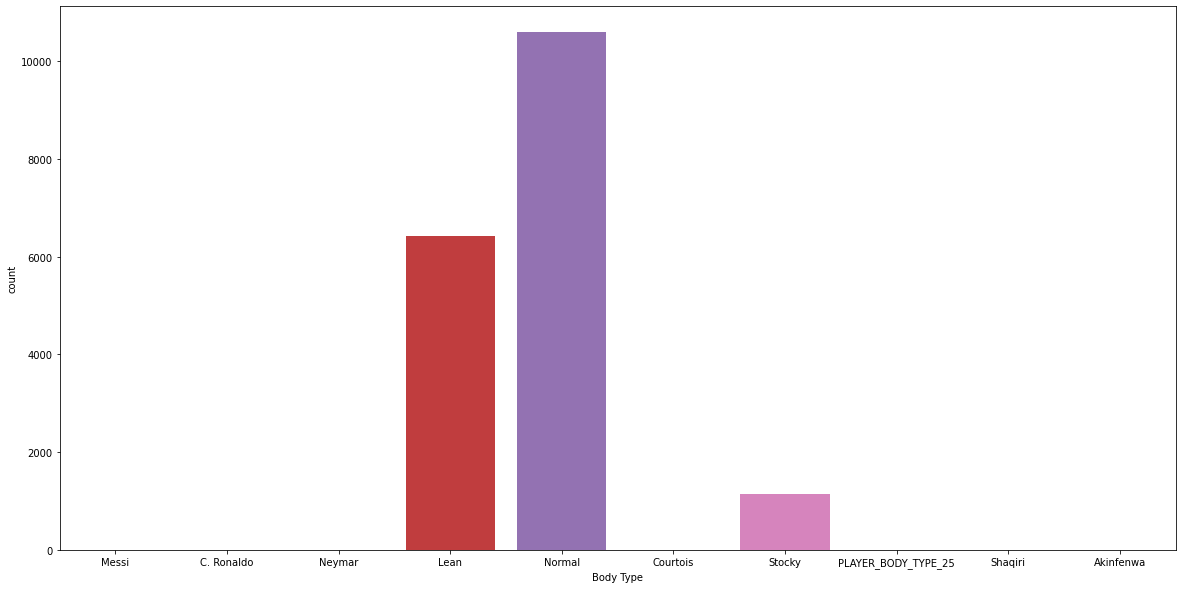

In [ ]:
# 
fig_dims = (20, 10) #Histograms of count of players vs Body Type
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Body Type', data = dataset, ax=ax) 

Text(0, 0.5, 'Frequency')

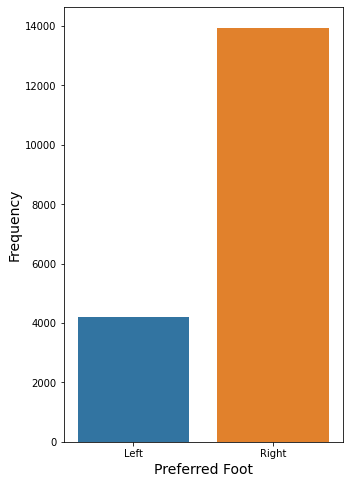

In [ ]:
fig_dims = (5, 8) #Histograms of count of players with respect to preferred foot.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Preferred Foot', data = dataset, ax = ax) 
plt.xlabel("Preferred Foot", size=14)
plt.ylabel("Frequency", size=14)

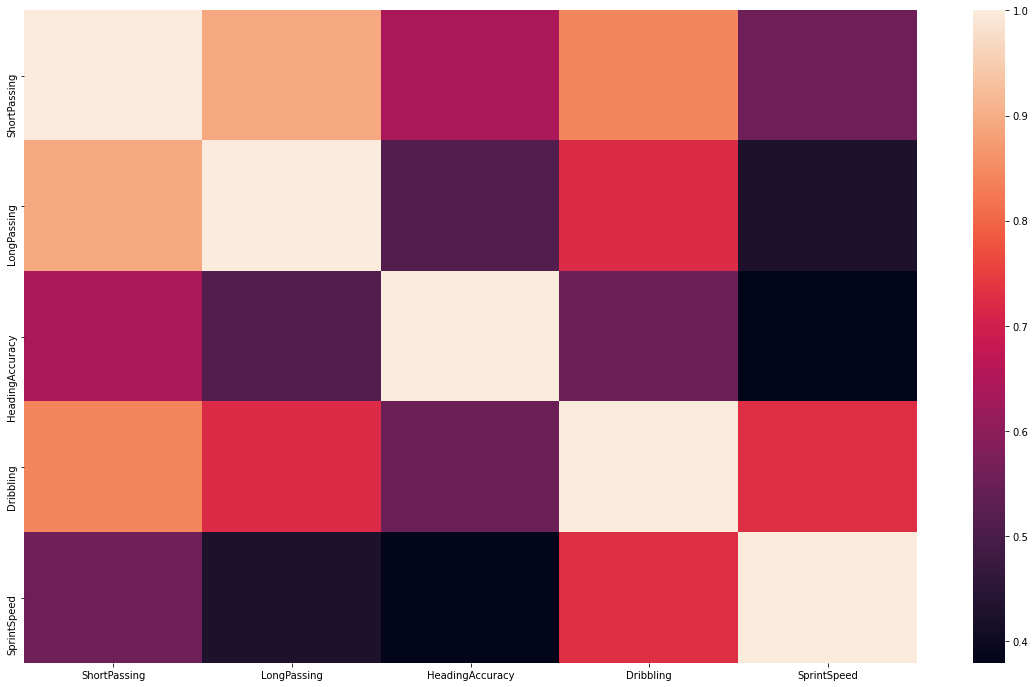

In [ ]:
correlation = dataset[['ShortPassing', 'LongPassing','HeadingAccuracy','Dribbling','SprintSpeed']].corr() #Heatmap for correlation
# sns.heatmap()
plt.figure(figsize=(20, 12))
corr_matrix = dataset1.corr()
corr_matrix
sns.heatmap(correlation)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


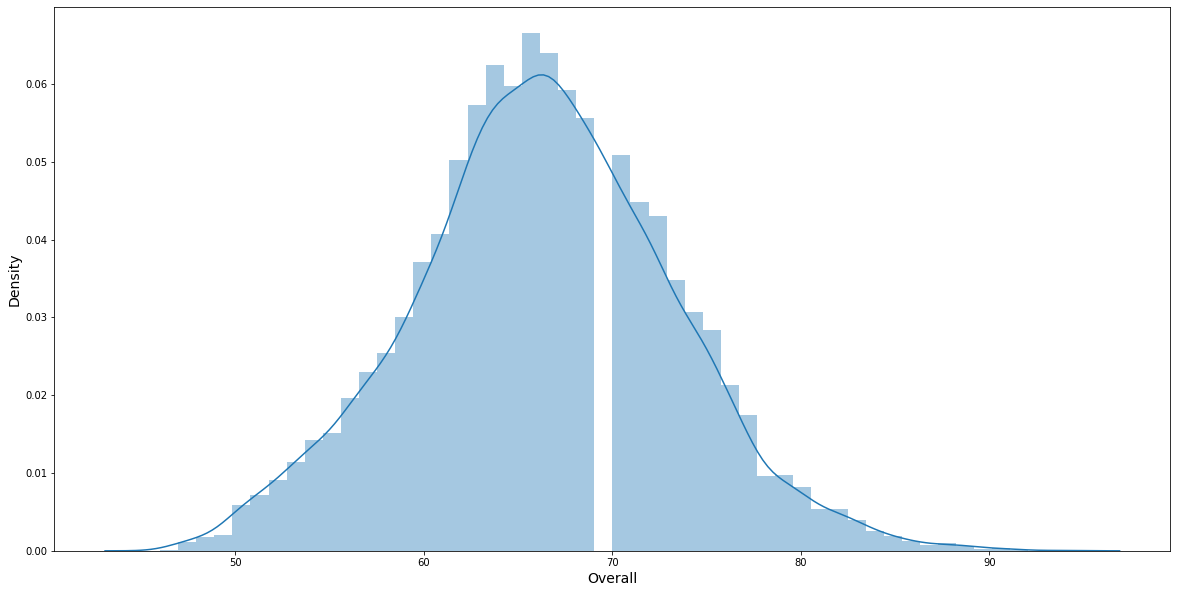

In [ ]:
overall=dataset['Overall']
fig_dims = (20, 10) #Histograms of count of players on the Position
fig, ax = plt.subplots(figsize = fig_dims)
sns.distplot(overall)   
plt.xlabel("Overall", size=14)
plt.ylabel("Density", size=14) 
plt.show()

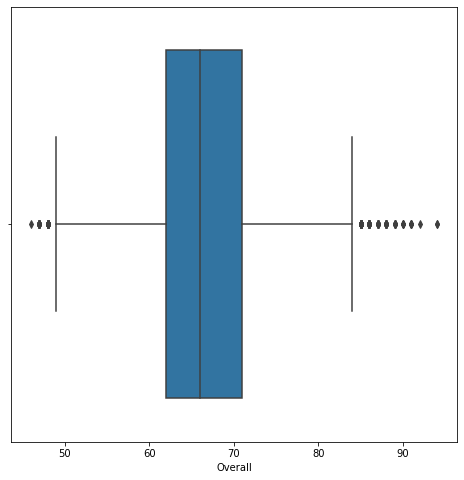

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x="Overall", data=dataset1)

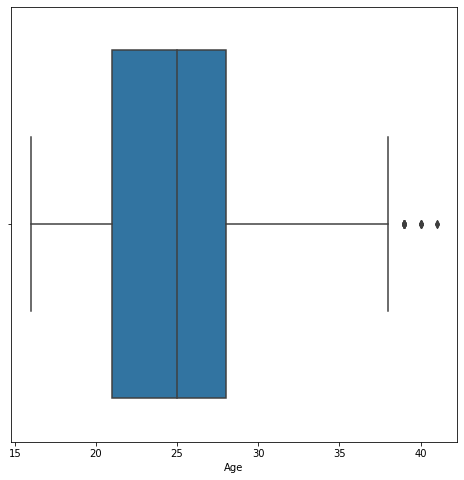

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x="Age", data=dataset1)

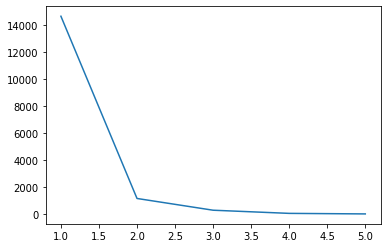

In [ ]:
dataset1['International Reputation'].value_counts().plot() #Line Plot

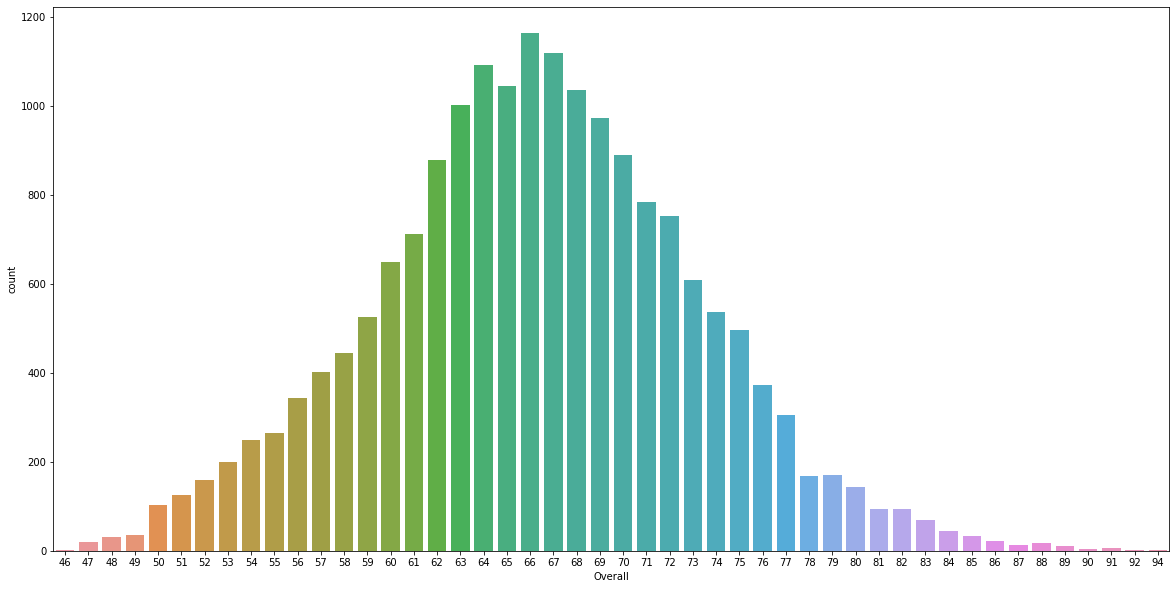

In [ ]:
fig_dims = (20, 10) #Histograms of count of players with respect to Overall.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Overall', data = dataset, ax=ax)

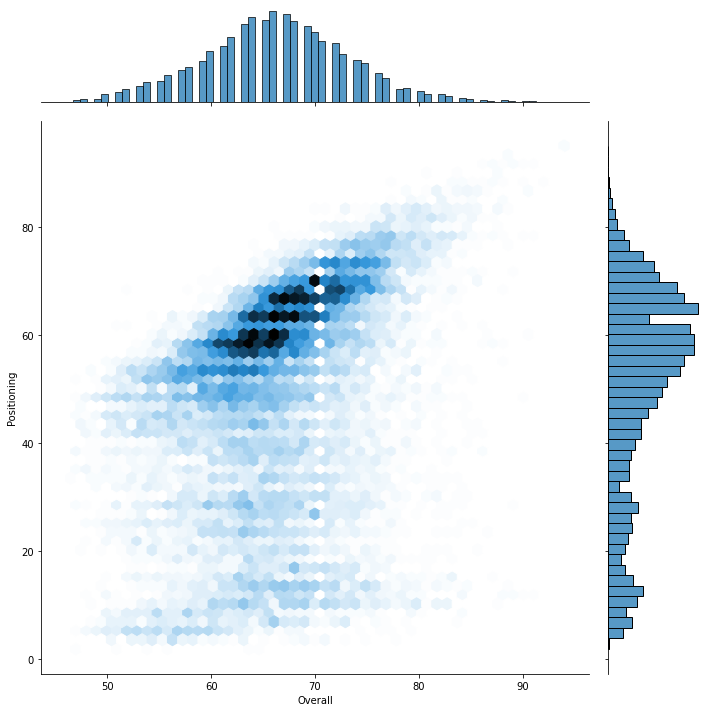

In [ ]:
sns.jointplot(data=dataset, x="Overall", y="Positioning", kind="hex", height=10)

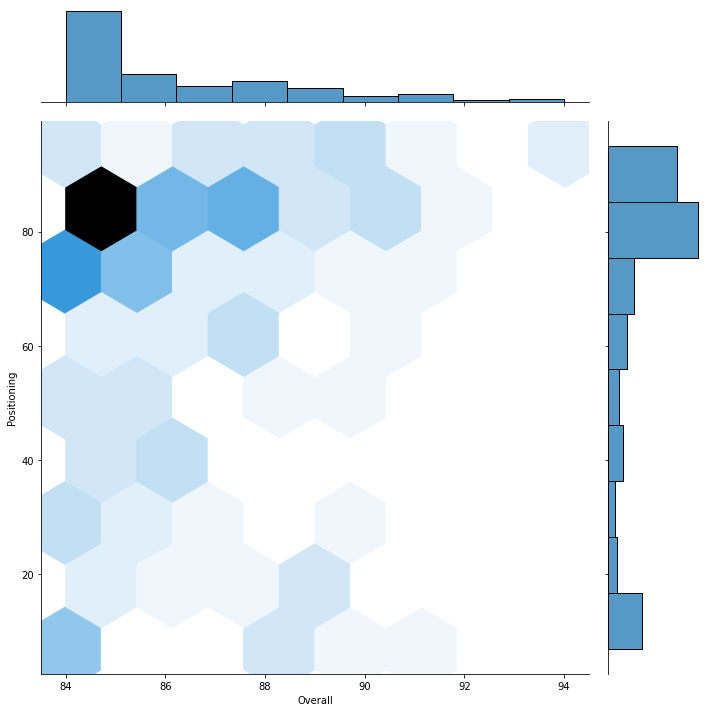

In [ ]:
sns.jointplot(data=dataset.head(150), x="Overall", y="Positioning", kind="hex", height=10)

Text(0, 0.5, 'Sprint Speed')

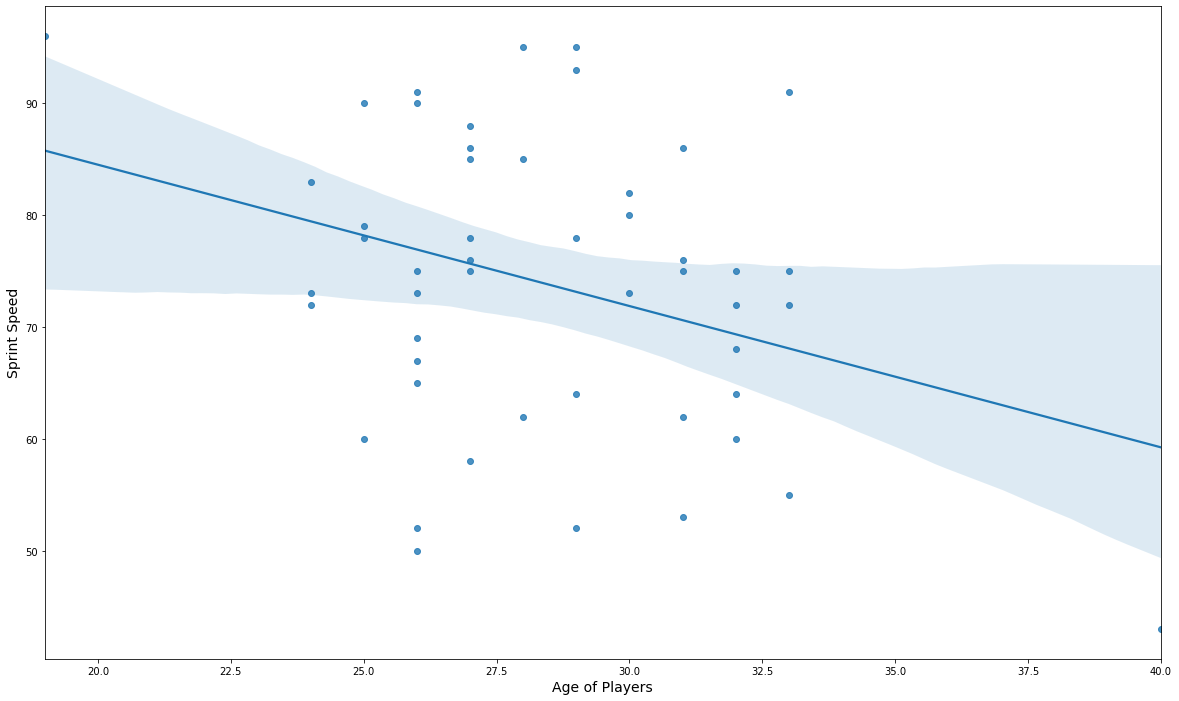

In [ ]:
plt.figure(figsize=(20, 12))
sns.regplot(x = "Age", y = "SprintSpeed", data = dataset.head(50))
plt.xlabel("Age of Players", size=14)
plt.ylabel("Sprint Speed", size=14)

Text(0, 0.5, 'Strength')

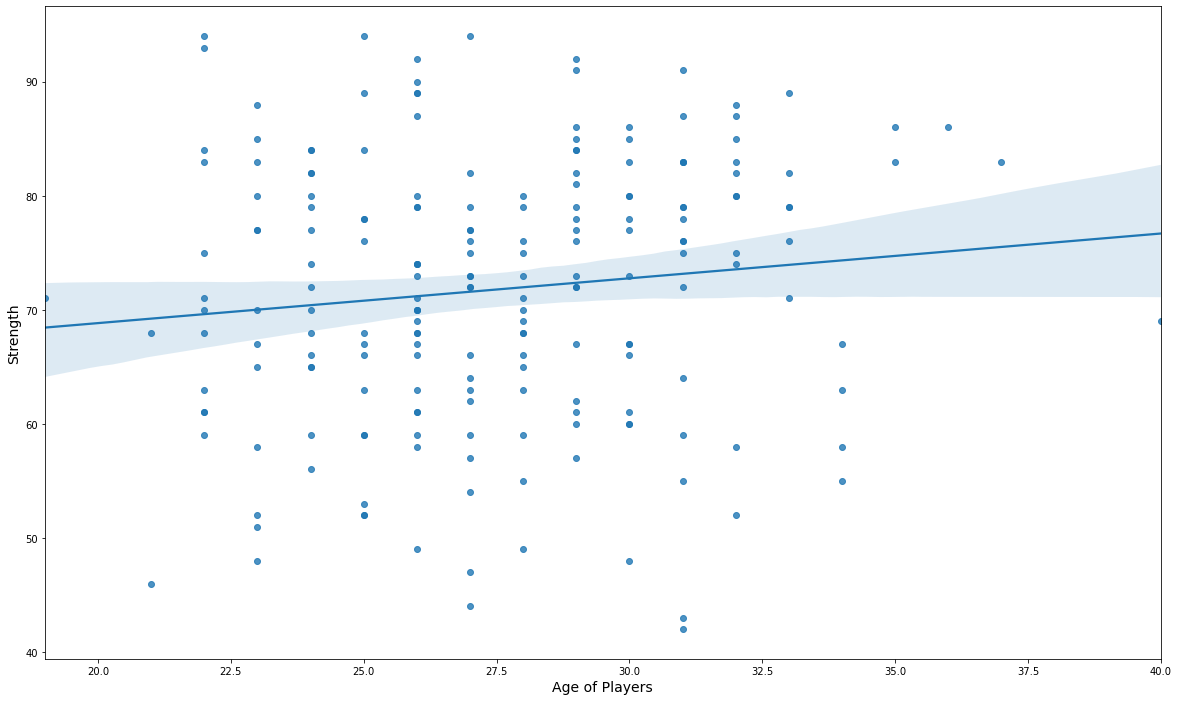

In [ ]:
plt.figure(figsize=(20, 12))
sns.regplot(x = "Age", y = "Strength", data = dataset.head(200))
plt.xlabel("Age of Players", size=14)
plt.ylabel("Strength", size=14)

Text(0, 0.5, 'Vision')

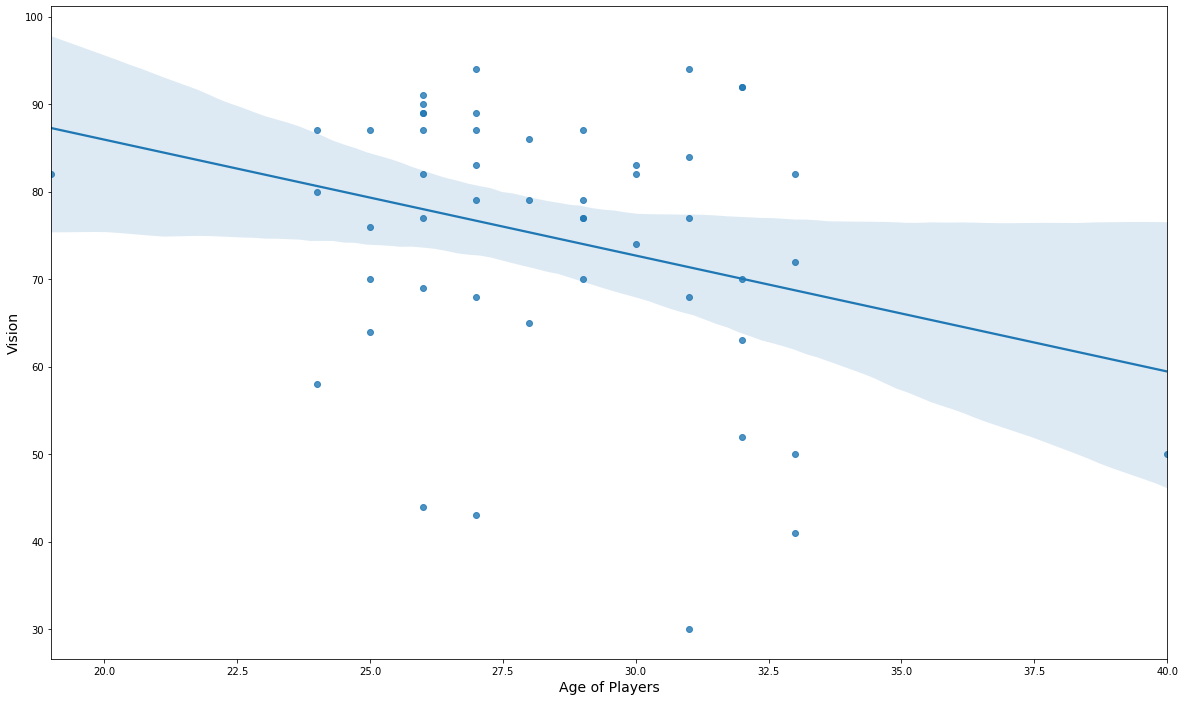

In [ ]:
plt.figure(figsize=(20, 12))
sns.regplot(x = "Age", y = "Vision", data = dataset.head(50))
plt.xlabel("Age of Players", size=14)
plt.ylabel("Vision", size=14)

#Data cleaning and preprocessing

In [ ]:
dataset.describe()

Unnamed: 0             ID  ...  GKPositioning    GKReflexes
count  18207.000000   18207.000000  ...   18159.000000  18159.000000
mean    9103.000000  214298.338606  ...      16.388898     16.710887
std     5256.052511   29965.244204  ...      17.034669     17.955119
min        0.000000      16.000000  ...       1.000000      1.000000
25%     4551.500000  200315.500000  ...       8.000000      8.000000
50%     9103.000000  221759.000000  ...      11.000000     11.000000
75%    13654.500000  236529.500000  ...      14.000000     14.000000
max    18206.000000  246620.000000  ...      90.000000     94.000000

[8 rows x 44 columns]

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
dataset['Body Type'].nunique()
print(dataset['Body Type'].unique())
print()

dataset['Preferred Foot'].nunique()
print(dataset['Preferred Foot'].unique())
print()

print(dataset['GKDiving'].nunique())
print(dataset['GKHandling'].nunique())
print(dataset['GKKicking'].nunique())
print(dataset['GKPositioning'].nunique())
print(dataset['GKReflexes'].nunique())

['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa' nan]

['Left' 'Right' nan]

71
70
79
79
76


In [ ]:
dataset

Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]

In [ ]:
PositionsList = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for (columnName, columnData) in dataset.iteritems():
  if columnName in PositionsList:
    dataset[columnName] = dataset[columnName].apply(lambda position : int(position[:-2]) +  (int(position[3:4])//2) if type(position) is str else float(position))
  elif columnName == "Weight":
    dataset[columnName] = dataset[columnName].apply(lambda weight : float(weight[:-3]) if type(weight) is str else float(weight))

dataset1 = dataset.drop(dataset.select_dtypes(include=[object]),axis = 1)
dataset1['Position']=dataset.Position


Height = []
PreferredFoot = []


for (columnName, columnData) in dataset.iteritems(): 
    if columnName == "Height":
      for height in columnData.values:
        if type(height) is str:
          modified_height_split = re.split("'",str(height))
          modified_height = (12 * int(modified_height_split[0])) + int(modified_height_split[1])
          Height.append(float(modified_height))
        else:
          Height.append(float(height))
    elif columnName == "Preferred Foot":
      for foot in columnData.values:
        if type(foot) is str:
          if foot == "Left":
            PreferredFoot.append(0)
          else:
            PreferredFoot.append(1)
        else:
          PreferredFoot.append(foot)
dataset1.insert(7, "Height", Height, True)
dataset1.insert(8, "Preferred Foot", PreferredFoot, True) 

dataset1 = dataset1.dropna()
dataset1.reset_index(drop = True)
positions=dataset1.Position
to_drop=['Unnamed: 0','ID','Jersey Number','Position']
dataset1.columns
dataset1.drop(to_drop,axis=1,inplace=True)
dataset1.columns
dataset1.describe()


Age       Overall  ...  GKPositioning    GKReflexes
count  16122.000000  16122.000000  ...   16122.000000  16122.000000
mean      25.005272     66.461233  ...      10.529215     10.508436
std        4.547106      6.794631  ...       3.079219      3.100045
min       16.000000     46.000000  ...       1.000000      1.000000
25%       21.000000     62.000000  ...       8.000000      8.000000
50%       25.000000     66.000000  ...      10.500000     10.000000
75%       28.000000     71.000000  ...      13.000000     13.000000
max       41.000000     94.000000  ...      33.000000     37.000000

[8 rows x 70 columns]

Text(0, 0.5, 'Height')

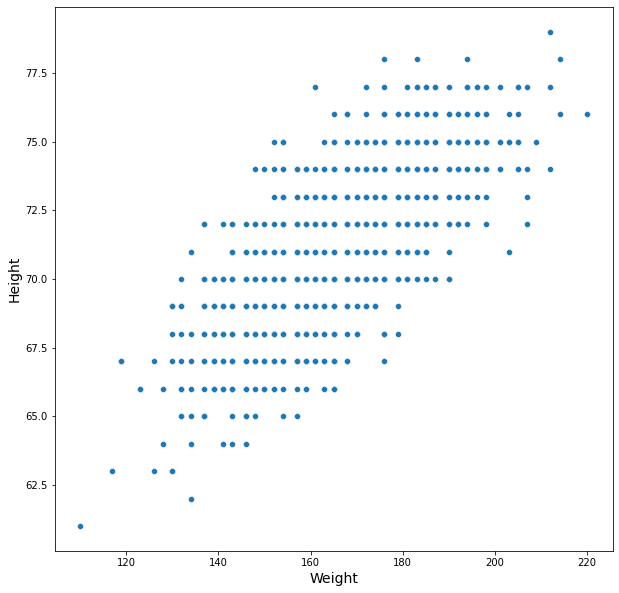

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Weight', y = 'Height', data = dataset1.sample(2000))
plt.xlabel("Weight", size=14)
plt.ylabel("Height", size=14)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


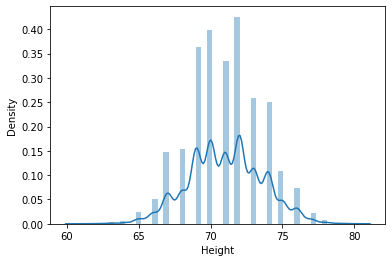

In [ ]:
height=dataset1['Height']
sns.distplot(height)    
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


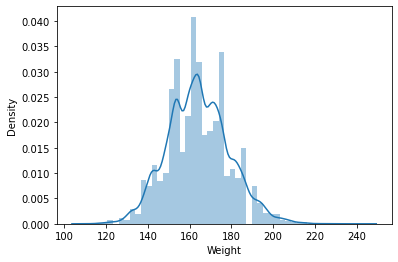

In [ ]:
weight=dataset1['Weight']
sns.distplot(weight) 
plt.show()

Text(0.5, 0, 'LongPassing')

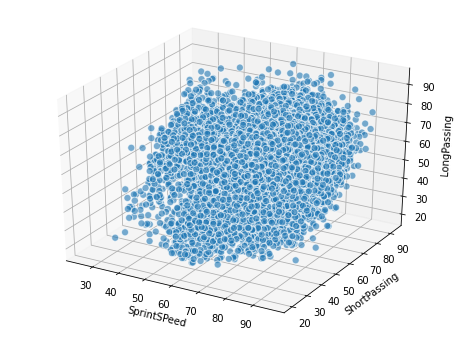

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = dataset1['SprintSpeed']
ys = dataset1['ShortPassing']
zs = dataset1['LongPassing']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('SprintSPeed')
ax.set_ylabel('ShortPassing')
ax.set_zlabel('LongPassing')

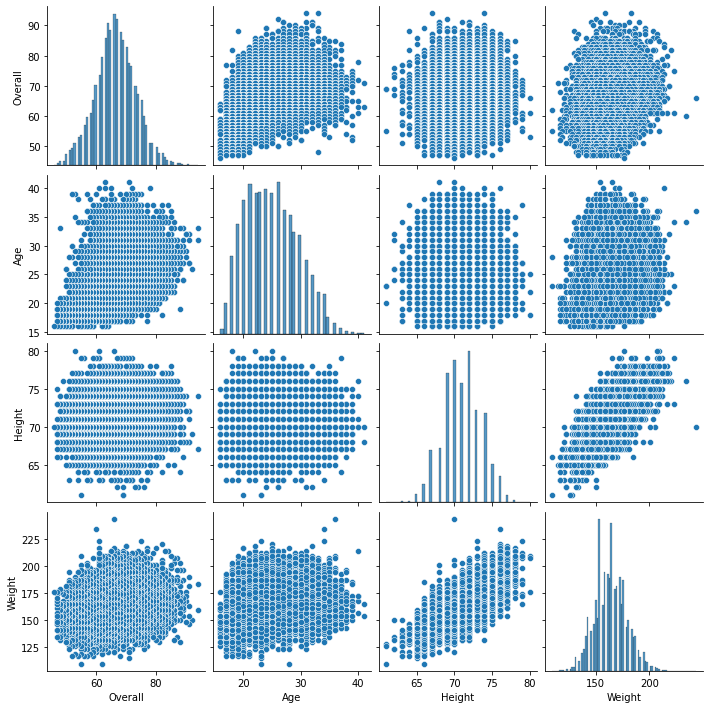

In [ ]:
g = sns.pairplot(dataset1[['Overall','Age','Height','Weight']])
sns.despine()
plt.show()

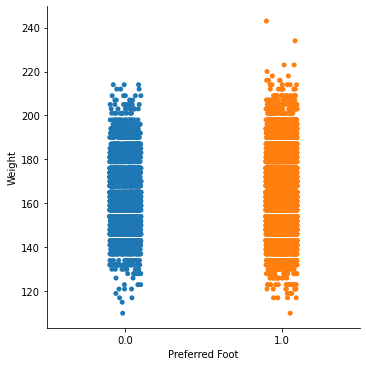

In [ ]:
sns.catplot(x="Preferred Foot", y="Weight", data=dataset1)

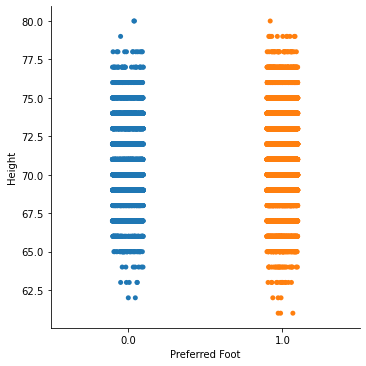

In [ ]:
sns.catplot(x="Preferred Foot", y="Height", data=dataset1)

#Creating data frame to be used for clustering algos :

In [ ]:
# gfg aglomerative

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 

# from sklearn import preprocessing
# data_scaled = normalize(dataset1)
# data_scaled = pd.DataFrame(data_scaled, columns=dataset1.columns)
# data_scaled
# # data_scaled.isnull().sum()
# # data_scaled.describe()

# import scipy.cluster.hierarchy as shc
# plt.figure(figsize = (30, 25))
# plt.title("Dendrograms")
# dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
# # dend = shc.dendrogram((shc.linkage(dataset1, method='ward')))

# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
d_scaled = scaler.fit_transform(dataset1) 

# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
d_normalized = normalize(d_scaled) 

# Converting the numpy array into a pandas DataFrame 
d_normalized = pd.DataFrame(d_normalized,columns=dataset1.columns) 

d_normalized.describe()


Age       Overall  ...  GKPositioning    GKReflexes
count  16122.000000  16122.000000  ...   16122.000000  16122.000000
mean      -0.002310     -0.008848  ...       0.000681      0.000893
std        0.134075      0.113187  ...       0.137239      0.136795
min       -0.430540     -0.392749  ...      -0.601677     -0.444630
25%       -0.104662     -0.090881  ...      -0.103007     -0.103095
50%       -0.000203     -0.007507  ...      -0.000426     -0.011001
75%        0.089340      0.083826  ...       0.103830      0.104459
max        0.487517      0.255684  ...       0.510738      0.586013

[8 rows x 70 columns]

In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(d_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.describe()
X_principal


P1        P2
0     -0.853556  0.133410
1     -0.825017  0.064017
2     -0.832614  0.142031
3     -0.881062 -0.179341
4     -0.882184  0.116651
...         ...       ...
16117  0.857515  0.326614
16118  0.823264  0.504215
16119  0.721473  0.649823
16120  0.703357  0.635846
16121  0.912558  0.261119

[16122 rows x 2 columns]

#Metrics to analyze cluster i.e. inter cluster and intra cluster similarity : 

In [46]:
def dist(a1,a2):
  return distance.euclidean(a1,a2)

In [47]:
class Clustermetric:
  def __init__(self,df,label,n):
    self.df = df
    self.labels = label
    self.num_of_clusters = n
    self.num_data = self.df.to_numpy()
    self.metric = {}
    
  def initiatematrix(self,n,m):
    return np.zeros((n,m), dtype = float)

  def distancematrix(self):
    cluster = {}
    n = self.num_of_clusters
    for i in range(n):
      cluster[i] = []

    for i in range(len(self.labels)):
      cluster[self.labels[i]].append(self.num_data[i])
    
    for i in range(n):
      cluster[i] = np.array(cluster[i])

    Single_LinkageDistance = self.initiatematrix(n,n)
    Complete_LinkageDistance = self.initiatematrix(n,n)
    Average_LinkageDistance = self.initiatematrix(n,n)
    Centroid_LinkageDistance = self.initiatematrix(n,n)
    AC_LinkageDistance = self.initiatematrix(n,n)

    for i in range(n):
      for j in range(i,n):
        temp = euclidean_distances(cluster[i],cluster[j])
        min_val = np.amin(temp)
        max_val = np.amax(temp)
        mean_val = np.mean(temp)
        cen_val = dist(np.array([np.mean(cluster[j],axis = 0)]),np.array([np.mean(cluster[i],axis = 0)]))
        a1 = np.sum(euclidean_distances(cluster[i],np.array([np.mean(cluster[j],axis = 0)])))
        a2 = np.sum(euclidean_distances(cluster[j],np.array([np.mean(cluster[i],axis = 0)])))
        ac_val = (a1 + a2)/(len(cluster[i]) + len(cluster[j]))
        
        Single_LinkageDistance[i][j] =  min_val
        Single_LinkageDistance[j][i] = min_val

        Complete_LinkageDistance[i][j] = max_val
        Complete_LinkageDistance[j][i] = max_val
        
        Average_LinkageDistance[i][j] = mean_val
        Average_LinkageDistance[j][i] = mean_val
        
        Centroid_LinkageDistance[i][j] = cen_val
        Centroid_LinkageDistance[j][i] = cen_val
        
        AC_LinkageDistance[i][j] = ac_val
        AC_LinkageDistance[j][i] = ac_val
        
    #storing the metrics
    self.metric['Single'] = Single_LinkageDistance
    self.metric['Complete'] = Complete_LinkageDistance
    self.metric['Average'] = Average_LinkageDistance
    self.metric['Centroid'] = Centroid_LinkageDistance
    self.metric['AverageCentroid'] = AC_LinkageDistance 
    return self.metric

def print_metrics(metric):
  for keys in metric:
    print(keys)
    print(np.matrix(metric[keys]))



The above code is to calculate the inter and intra class metric between cluster. If N is the number of clusters, it return a N*N matrix for each type of score where matrix[i][j] denotes the score between cluster i and cluster j which is the intercluster metric, the metric on the diagonal denotes intra cluster since it is the metric for a given cluster with itself.

#**Task 2 : K - means**

#Implementation

In [54]:


class KmeansCluster:
  def __init__(self,df,k):
    self.data = df
    self.k = k
    self.num_data = self.data.to_numpy()
    self.N = self.num_data.shape[1]
    self.distortion = 0.0

  def calc_distortion(self,label,oldk):
    temp = 0.0
    l=len(label)
    for i in range(l):
      d1 = dist(self.num_data[i],oldk[label[i]])
      temp += d1*d1
    return (temp/l)

  def Clustering(self):
    keys = list(self.data.keys())
    pts = []
    for i in range(self.k):
      pts.append(random.choice(self.num_data))
    oldk = pts
    while (1):
      cluster = {}
      Total_d = 0
      label = []
      newk = []

      for i in range(self.k):
        cluster[i] = []
      
      for row in self.num_data:
        pt = row
        dis_min = dist(pt,oldk[0])
        clus = 0
        for i in range(self.k):
          if dist(oldk[i],pt) < dis_min:
            dis_min = dist(oldk[i],pt)
            clus = i
        label.append(clus)
        cluster[clus].append(pt)

      for i in range(self.k):
        cluster[i] = np.array(cluster[i])
        newk.append(cluster[i].mean(axis = 0))
        Total_d += dist(oldk[i],newk[i])
      oldk = newk
      if (Total_d < 1/1000000):
        break
    self.distortion = self.calc_distortion(label,oldk)
    return np.array(label)


###K=3

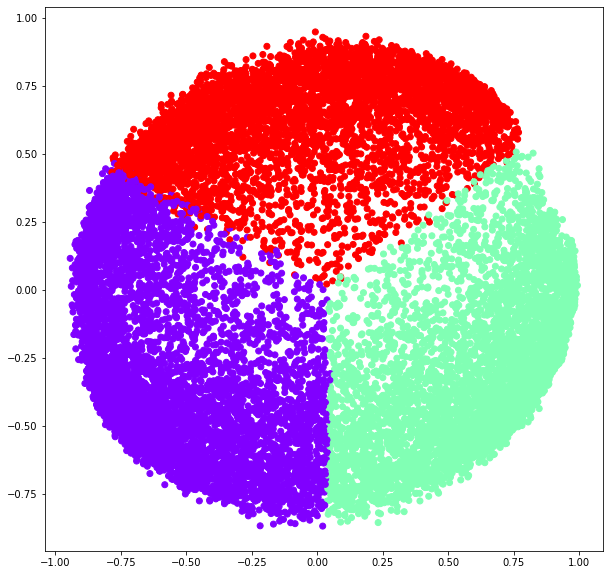

Single
[[0.         0.37454704 0.34075417]
 [0.37454704 0.         0.27855929]
 [0.34075417 0.27855929 0.        ]]
Complete
[[1.90179963 1.97509356 1.97371079]
 [1.97509356 1.85823196 1.95593388]
 [1.97371079 1.95593388 1.82433755]]
Average
[[1.08035623 1.56190039 1.49979728]
 [1.56190039 1.04062137 1.52777586]
 [1.49979728 1.52777586 1.09898987]]
Centroid
[[0.         1.14210977 1.0332719 ]
 [1.14210977 0.         1.08706458]
 [1.0332719  1.08706458 0.        ]]
AverageCentroid
[[0.76452596 1.36812447 1.28738912]
 [1.36812447 0.73722187 1.32644377]
 [1.28738912 1.32644377 0.78463873]]


In [55]:
metric_kmeans=[]
l_kmeans=[]
k=3
obj=KmeansCluster(d_normalized,k)
l_kmeans.append(obj.Clustering())
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
    c = l_kmeans[0], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_kmeans[0],k)
metric_kmeans.append(metric.distancematrix())
print_metrics(metric_kmeans[0])
d_l=dataset1
d_l['Labels']=l_kmeans[0]
grouped = d_l.groupby(d_l.Labels)
# print(obj.distortion)

####cluster 0

In [ ]:
grouped.get_group(0).head(10)

Age  Overall  Potential  ...  GKPositioning  GKReflexes  Labels
0    31       94         94  ...           14.0         8.0       0
1    33       94         94  ...           14.0        11.0       0
2    26       92         93  ...           15.0        11.0       0
4    27       91         92  ...           10.0        13.0       0
5    27       91         91  ...            8.0         8.0       0
6    32       91         91  ...           14.0         9.0       0
7    31       91         91  ...           33.0        37.0       0
8    32       91         91  ...            7.0        11.0       0
10   29       90         90  ...            8.0        10.0       0
11   28       90         90  ...            7.0        10.0       0

[10 rows x 71 columns]

In [ ]:
grouped.get_group(0).describe()

Age      Overall  ...   GKReflexes  Labels
count  5818.000000  5818.000000  ...  5818.000000  5818.0
mean     26.764180    71.455139  ...    10.627191     0.0
std       4.087458     5.354235  ...     3.155649     0.0
min      16.000000    59.000000  ...     1.000000     0.0
25%      24.000000    67.000000  ...     8.000000     0.0
50%      27.000000    71.000000  ...    11.000000     0.0
75%      30.000000    75.000000  ...    13.000000     0.0
max      41.000000    94.000000  ...    37.000000     0.0

[8 rows x 71 columns]

####cluster 1

In [ ]:
grouped.get_group(0).head(10)

Age  Overall  Potential  ...  GKPositioning  GKReflexes  Labels
0    31       94         94  ...           14.0         8.0       0
1    33       94         94  ...           14.0        11.0       0
2    26       92         93  ...           15.0        11.0       0
4    27       91         92  ...           10.0        13.0       0
5    27       91         91  ...            8.0         8.0       0
6    32       91         91  ...           14.0         9.0       0
7    31       91         91  ...           33.0        37.0       0
8    32       91         91  ...            7.0        11.0       0
10   29       90         90  ...            8.0        10.0       0
11   28       90         90  ...            7.0        10.0       0

[10 rows x 71 columns]

In [ ]:
grouped.get_group(0).describe()

Age      Overall  ...   GKReflexes  Labels
count  5818.000000  5818.000000  ...  5818.000000  5818.0
mean     26.764180    71.455139  ...    10.627191     0.0
std       4.087458     5.354235  ...     3.155649     0.0
min      16.000000    59.000000  ...     1.000000     0.0
25%      24.000000    67.000000  ...     8.000000     0.0
50%      27.000000    71.000000  ...    11.000000     0.0
75%      30.000000    75.000000  ...    13.000000     0.0
max      41.000000    94.000000  ...    37.000000     0.0

[8 rows x 71 columns]

####cluster 2

In [ ]:
grouped.get_group(0).head(10)

Age  Overall  Potential  ...  GKPositioning  GKReflexes  Labels
0    31       94         94  ...           14.0         8.0       0
1    33       94         94  ...           14.0        11.0       0
2    26       92         93  ...           15.0        11.0       0
4    27       91         92  ...           10.0        13.0       0
5    27       91         91  ...            8.0         8.0       0
6    32       91         91  ...           14.0         9.0       0
7    31       91         91  ...           33.0        37.0       0
8    32       91         91  ...            7.0        11.0       0
10   29       90         90  ...            8.0        10.0       0
11   28       90         90  ...            7.0        10.0       0

[10 rows x 71 columns]

In [ ]:
grouped.get_group(0).describe()

Age      Overall  ...   GKReflexes  Labels
count  5818.000000  5818.000000  ...  5818.000000  5818.0
mean     26.764180    71.455139  ...    10.627191     0.0
std       4.087458     5.354235  ...     3.155649     0.0
min      16.000000    59.000000  ...     1.000000     0.0
25%      24.000000    67.000000  ...     8.000000     0.0
50%      27.000000    71.000000  ...    11.000000     0.0
75%      30.000000    75.000000  ...    13.000000     0.0
max      41.000000    94.000000  ...    37.000000     0.0

[8 rows x 71 columns]

###K=5

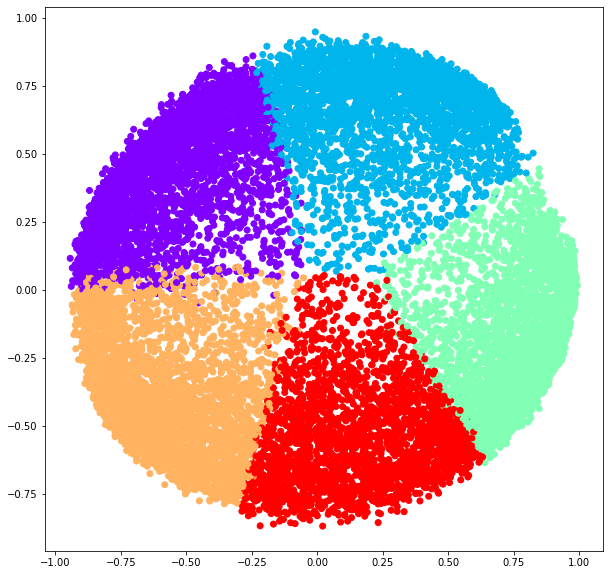

Single
[[0.         0.38154973 0.69531041 0.23929365 0.66806558]
 [0.38154973 0.         0.30776637 0.69077149 0.70207149]
 [0.69531041 0.30776637 0.         0.82254515 0.3505558 ]
 [0.23929365 0.69077149 0.82254515 0.         0.28445159]
 [0.66806558 0.70207149 0.3505558  0.28445159 0.        ]]
Complete
[[1.79661075 1.9155941  1.97509356 1.86217633 1.94501997]
 [1.9155941  1.82433755 1.88507617 1.97371079 1.95160343]
 [1.97509356 1.88507617 1.73666317 1.97333562 1.85296551]
 [1.86217633 1.97371079 1.97333562 1.80917784 1.9191338 ]
 [1.94501997 1.95160343 1.85296551 1.9191338  1.90179963]]
Average
[[1.00181119 1.30795869 1.72106412 1.26925888 1.6043577 ]
 [1.30795869 0.99682851 1.35043826 1.66326997 1.61437238]
 [1.72106412 1.35043826 0.88076225 1.65124098 1.24999519]
 [1.26925888 1.66326997 1.65124098 0.95890007 1.30830742]
 [1.6043577  1.61437238 1.24999519 1.30830742 1.15090163]]
Centroid
[[0.         0.84408101 1.42996882 0.80900061 1.17934458]
 [0.84408101 0.         0.96692816 1

In [ ]:
k=5
obj=KmeansCluster(d_normalized,k)
l_kmeans.append(obj.Clustering())
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
    c = l_kmeans[1], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_kmeans[1],k)
metric_kmeans.append(metric.distancematrix())
print_metrics(metric_kmeans[1])
d_l=dataset1
d_l['Labels']=l_kmeans[1]
grouped = d_l.groupby(d_l.Labels)

###K=7

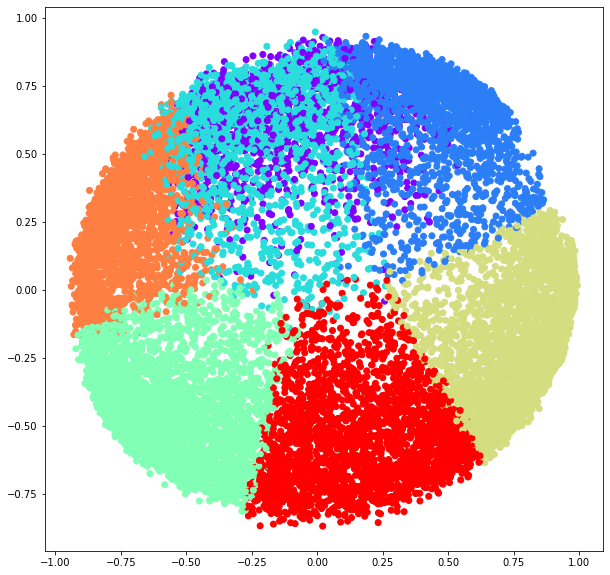

Single
[[0.         0.32666275 0.40042109 0.71152948 0.65144653 0.33216639
  0.69531041]
 [0.32666275 0.         0.3697345  0.84939841 0.29903285 0.7738727
  0.70602785]
 [0.40042109 0.3697345  0.         0.50755681 0.67950996 0.37349696
  0.61469243]
 [0.71152948 0.84939841 0.50755681 0.         0.82254515 0.21302191
  0.33872462]
 [0.65144653 0.29903285 0.67950996 0.82254515 0.         1.00094368
  0.3505558 ]
 [0.33216639 0.7738727  0.37349696 0.21302191 1.00094368 0.
  0.78352791]
 [0.69531041 0.70602785 0.61469243 0.33872462 0.3505558  0.78352791
  0.        ]]
Complete
[[1.70889404 1.87729247 1.88638832 1.94281772 1.92724228 1.87245306
  1.93439402]
 [1.87729247 1.73380476 1.83599787 1.97371079 1.79950976 1.94471381
  1.95115662]
 [1.88638832 1.83599787 1.75044193 1.92449508 1.95299768 1.85249115
  1.94501997]
 [1.94281772 1.97371079 1.92449508 1.7829568  1.97098097 1.77206163
  1.89967336]
 [1.92724228 1.79950976 1.95299768 1.97098097 1.70496245 1.97509356
  1.83646384]
 [1.8724

In [ ]:
k=7
obj=KmeansCluster(d_normalized,k)
l_kmeans.append(obj.Clustering())
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
    c = l_kmeans[2], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_kmeans[2],k)
metric_kmeans.append(metric.distancematrix())
print_metrics(metric_kmeans[2])
d_l=dataset1
d_l['Labels']=l_kmeans[2]
grouped = d_l.groupby(d_l.Labels)

### The Inter Cluster and Intra Cluster analysis for the aboove is given in the report submitted along with this notebook

###Silhouette and elbow plot for k ={2,3,4,5,6,7}

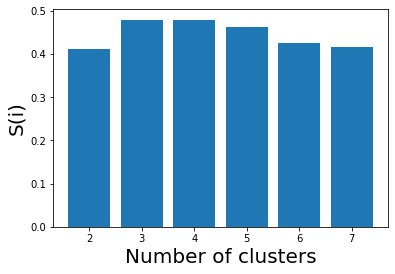

[0.4117716501540424, 0.4791817175199272, 0.47925294273210595, 0.4614201629916213, 0.4252911423540267, 0.4163795537318192]


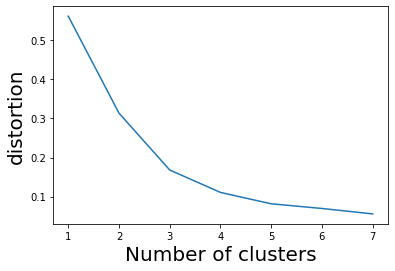

[0.5616725383493414, 0.31344273512120585, 0.1680104890723726, 0.11066255693258265, 0.08152265522455979, 0.0695685357100807, 0.05562604290165867]


In [ ]:
silhouette_scores = [] 
distortion=[]
for k in range(1,8):
  obj=KmeansCluster(X_principal,k,1)
  l=obj.Clustering()
  if k>1 :
    silhouette_scores.append( silhouette_score(X_principal,l)) 
  distortion.append(obj.distortion)
# Plotting a bar graph to compare the results 
plt.bar([2,3,4,5,6,7], silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()
print(silhouette_scores)

plt.plot([1,2,3,4,5,6,7], distortion) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('distortion', fontsize = 20)
plt.show() 
print(distortion)

###k=3 histogram

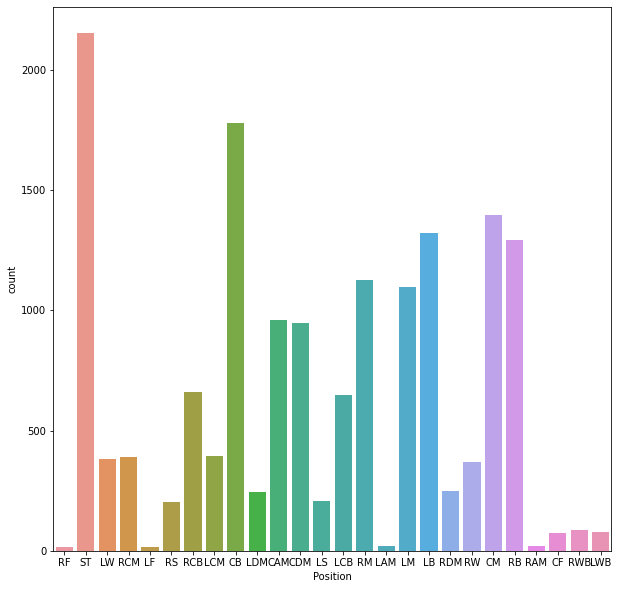

In [ ]:
d_l=dataset1
d_l['Labels']=l_kmeans[0]
d_l['Position']=positions
d_l
grouped = d_l.groupby(d_l.Labels)
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data = d_l, ax=ax) 
# grouped.get_group(0)

Age  Overall  Potential  ...  GKReflexes  Labels  Position
0       31       94         94  ...         8.0       0        RF
1       33       94         94  ...        11.0       0        ST
2       26       92         93  ...        11.0       0        LW
4       27       91         92  ...        13.0       0       RCM
5       27       91         91  ...         8.0       0        LF
...    ...      ...        ...  ...         ...     ...       ...
15093   29       60         60  ...         8.0       0       CDM
15118   21       60         68  ...         8.0       0       CAM
15139   34       60         60  ...         6.0       0       CDM
15245   21       60         69  ...         6.0       0       CDM
15672   34       59         59  ...         7.0       0       CDM

[5818 rows x 72 columns]

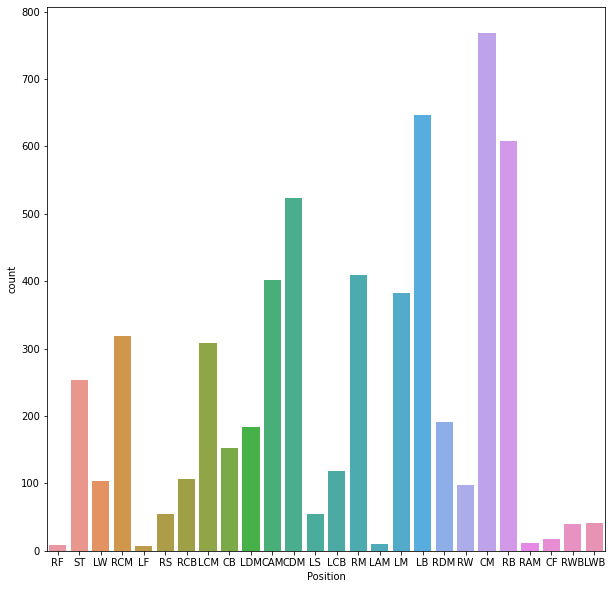

In [ ]:

fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data = grouped.get_group(0), ax=ax) 
grouped.get_group(0)

Age  Overall  Potential  ...  GKReflexes  Labels  Position
44      27       87         90  ...         5.0       1       LCB
88      27       85         87  ...        12.0       1       LCB
111     23       84         88  ...        15.0       1       RCB
115     22       84         90  ...        15.0       1        CB
165     22       83         88  ...        14.0       1        CB
...    ...      ...        ...  ...         ...     ...       ...
18199   18       47         69  ...        15.0       1        CM
18201   18       47         68  ...        13.0       1        RB
18202   19       47         65  ...         9.0       1        CM
18203   19       47         63  ...        12.0       1        ST
18206   16       46         66  ...         9.0       1        CM

[5299 rows x 72 columns]

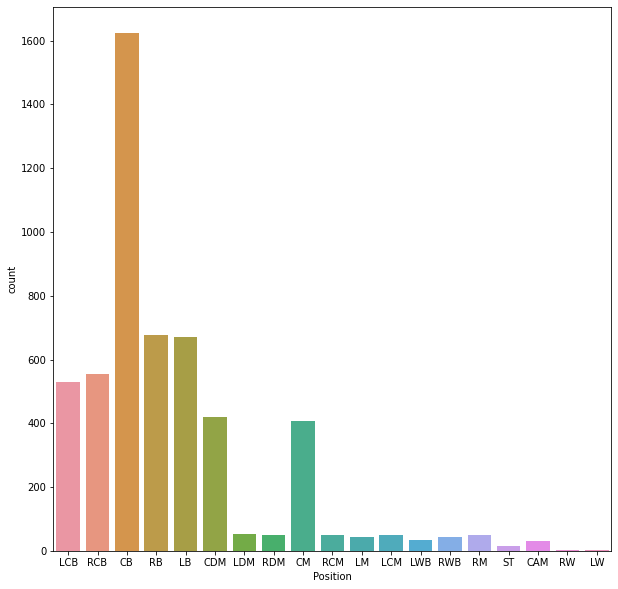

In [ ]:
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data = grouped.get_group(1), ax=ax)
grouped.get_group(1)

Age  Overall  Potential  ...  GKReflexes  Labels  Position
345     25       81         84  ...         8.0       2        LS
529     28       80         80  ...        13.0       2        ST
580     25       79         80  ...        14.0       2        LS
589     21       79         86  ...         7.0       2        RS
591     25       79         82  ...        15.0       2        ST
...    ...      ...        ...  ...         ...     ...       ...
18189   18       47         61  ...         8.0       2        ST
18197   18       47         61  ...        15.0       2        CM
18200   18       47         62  ...        11.0       2        ST
18204   16       47         67  ...        13.0       2        ST
18205   17       47         66  ...         9.0       2        RW

[5005 rows x 72 columns]

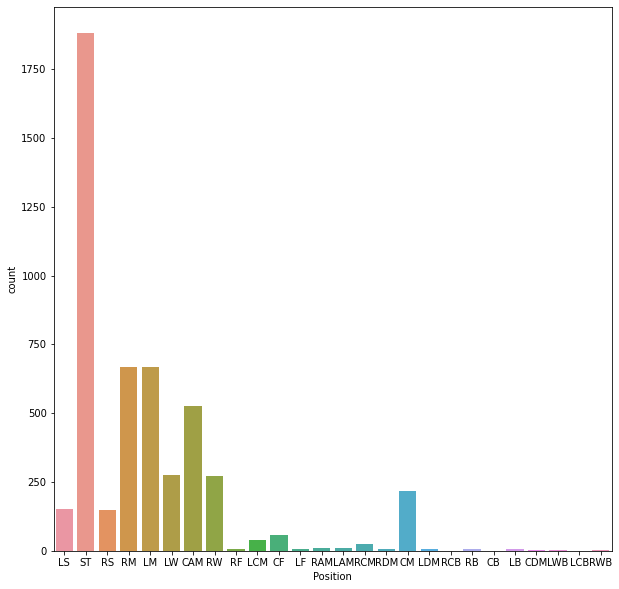

In [ ]:
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data = grouped.get_group(2), ax=ax)
grouped.get_group(2)

##Task 3 : Hierarchical Clustring  : Agglomerative(bottom-up strategy)

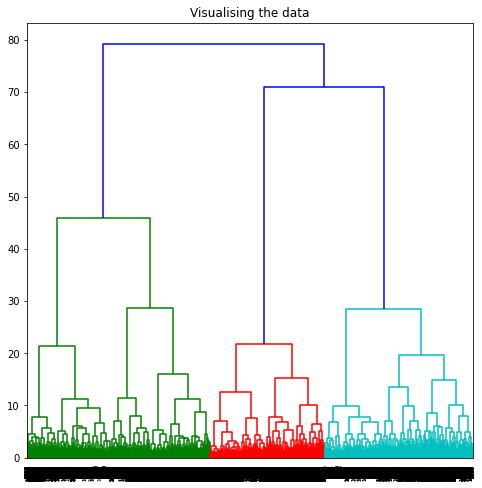

In [ ]:

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 

plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(d_normalized, method ='ward'))) 


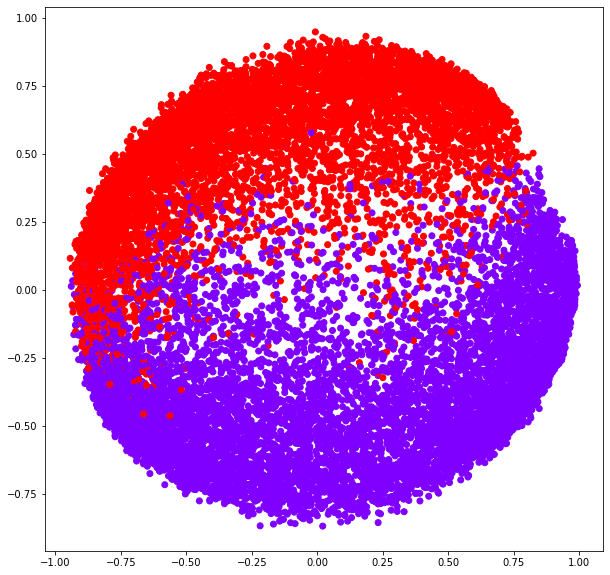

Single
[[0.         0.28156126]
 [0.28156126 0.        ]]
Complete
[[1.97345703 1.97509356]
 [1.97509356 1.96056646]]
Average
[[1.27199115 1.52535874]
 [1.52535874 1.16973492]]
Centroid
[[0.         0.89785702]
 [0.89785702 0.        ]]
AverageCentroid
[[0.92297571 1.26496314]
 [1.26496314 0.84053116]]


In [ ]:
l_algo=[]
k=2
ac = AgglomerativeClustering(n_clusters = k) 

# Visualizing the clustering 
l_algo.append(ac.fit_predict(d_normalized))
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = l_algo[k-2], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_algo[k-2],k)
metric=metric.distancematrix()
print_metrics(metric)


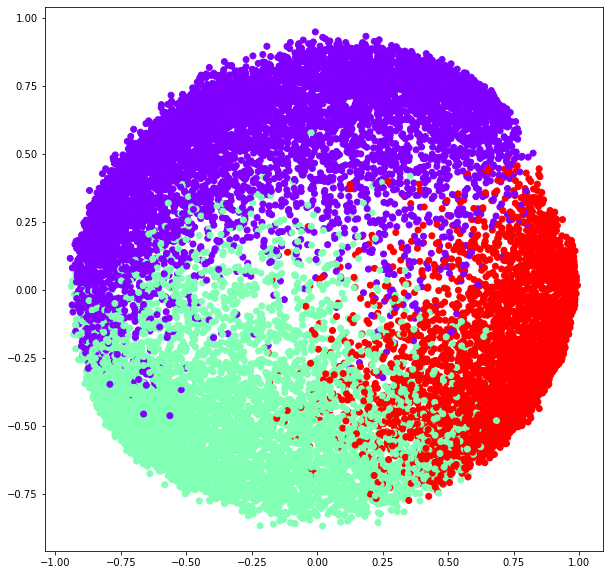

Single
[[0.         0.28156126 0.36595523]
 [0.28156126 0.         0.3570311 ]
 [0.36595523 0.3570311  0.        ]]
Complete
[[1.96056646 1.97371079 1.97509356]
 [1.97371079 1.93994452 1.97345703]
 [1.97509356 1.97345703 1.79502415]]
Average
[[1.16973492 1.50053658 1.55733609]
 [1.50053658 1.13893129 1.47890193]
 [1.55733609 1.47890193 0.95970952]]
Centroid
[[0.         0.95656601 1.12772688]
 [0.95656601 0.         1.03739127]
 [1.12772688 1.03739127 0.        ]]
AverageCentroid
[[0.84053116 1.26005139 1.36770511]
 [1.26005139 0.8080224  1.27990681]
 [1.36770511 1.27990681 0.67725703]]


In [ ]:
k=3
ac = AgglomerativeClustering(n_clusters = k) 

# Visualizing the clustering 
l_algo.append(ac.fit_predict(d_normalized))
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = l_algo[k-2], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_algo[k-2],k)
metric=metric.distancematrix()
print_metrics(metric)


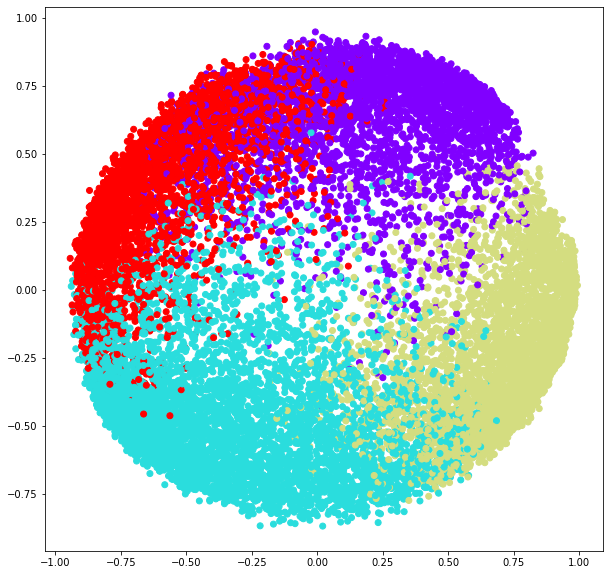

Single
[[0.         0.52198334 0.36595523 0.36562613]
 [0.52198334 0.         0.3570311  0.28156126]
 [0.36595523 0.3570311  0.         0.72783085]
 [0.36562613 0.28156126 0.72783085 0.        ]]
Complete
[[1.89072972 1.97371079 1.93486501 1.96056646]
 [1.97371079 1.93994452 1.97345703 1.94916403]
 [1.93486501 1.97345703 1.79502415 1.97509356]
 [1.96056646 1.94916403 1.97509356 1.79708559]]
Average
[[1.06546716 1.61994963 1.42392078 1.30456157]
 [1.61994963 1.13893129 1.47890193 1.36200807]
 [1.42392078 1.47890193 0.95970952 1.71210831]
 [1.30456157 1.36200807 1.71210831 0.99723765]]
Centroid
[[0.         1.17229558 0.99548659 0.80142553]
 [1.17229558 0.         1.03739127 0.85275042]
 [0.99548659 1.03739127 0.         1.3937104 ]
 [0.80142553 0.85275042 1.3937104  0.        ]]
AverageCentroid
[[0.75662598 1.41787725 1.22673782 1.08204891]
 [1.41787725 0.8080224  1.27990681 1.14278875]
 [1.22673782 1.27990681 0.67725703 1.56087614]
 [1.08204891 1.14278875 1.56087614 0.70673222]]


In [ ]:
k=4
ac = AgglomerativeClustering(n_clusters = k) 

# Visualizing the clustering 
l_algo.append(ac.fit_predict(d_normalized))
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = l_algo[k-2], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_algo[k-2],k)
metric=metric.distancematrix()
print_metrics(metric)

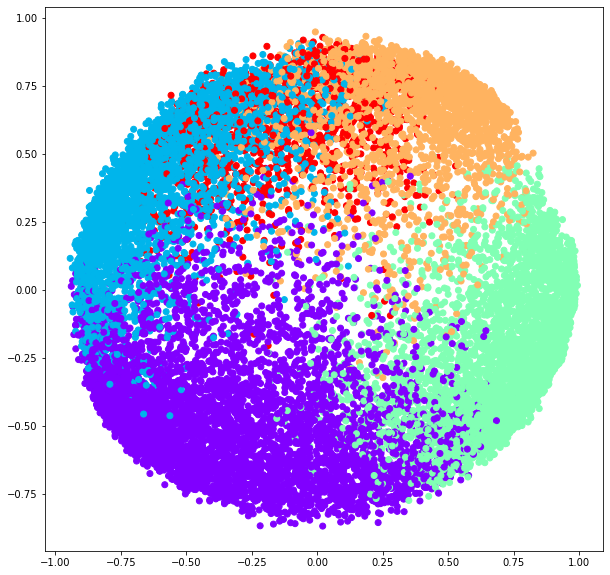

Single
[[0.         0.28156126 0.3570311  0.63389876 0.52198334]
 [0.28156126 0.         0.72783085 0.43925082 0.36562613]
 [0.3570311  0.72783085 0.         0.36595523 0.69774038]
 [0.63389876 0.43925082 0.36595523 0.         0.36775267]
 [0.52198334 0.36562613 0.69774038 0.36775267 0.        ]]
Complete
[[1.93994452 1.94916403 1.97345703 1.97371079 1.93463018]
 [1.94916403 1.79708559 1.97509356 1.96056646 1.89217055]
 [1.97345703 1.97509356 1.79502415 1.91812622 1.93486501]
 [1.97371079 1.96056646 1.91812622 1.79445855 1.89072972]
 [1.93463018 1.89217055 1.93486501 1.89072972 1.72143395]]
Average
[[1.13893129 1.36200807 1.47890193 1.65754407 1.55967175]
 [1.36200807 0.99723765 1.71210831 1.37510836 1.19144879]
 [1.47890193 1.71210831 0.95970952 1.33163353 1.57189162]
 [1.65754407 1.37510836 1.33163353 0.95222201 1.18511386]
 [1.55967175 1.19144879 1.57189162 1.18511386 0.97292169]]
Centroid
[[0.         0.85275042 1.03739127 1.27032849 1.13673551]
 [0.85275042 0.         1.3937104  0

In [ ]:
k=5
ac = AgglomerativeClustering(n_clusters = k) 

# Visualizing the clustering 
l_algo.append(ac.fit_predict(d_normalized))
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = l_algo[k-2], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_algo[k-2],k)
metric=metric.distancematrix()
print_metrics(metric)

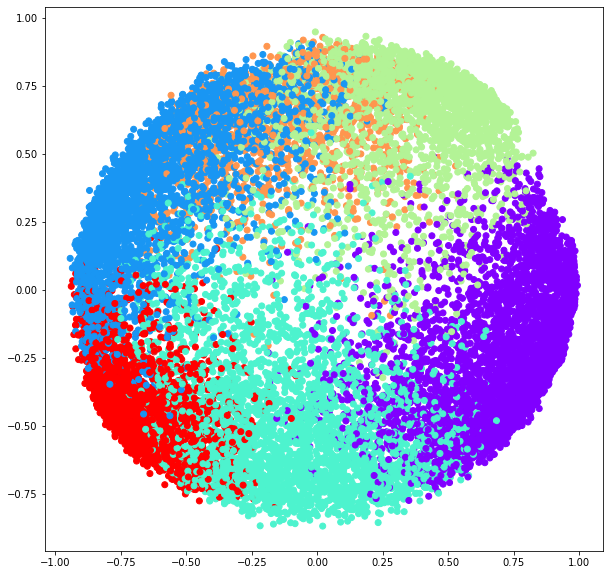

Single
[[0.         0.72783085 0.3570311  0.36595523 0.69774038 0.67377051]
 [0.72783085 0.         0.45741356 0.43925082 0.36562613 0.28156126]
 [0.3570311  0.45741356 0.         0.63389876 0.65403438 0.37583771]
 [0.36595523 0.43925082 0.63389876 0.         0.36775267 0.81645155]
 [0.69774038 0.36562613 0.65403438 0.36775267 0.         0.52198334]
 [0.67377051 0.28156126 0.37583771 0.81645155 0.52198334 0.        ]]
Complete
[[1.79502415 1.97509356 1.93821815 1.91812622 1.93486501 1.97345703]
 [1.97509356 1.79708559 1.94916403 1.96056646 1.89217055 1.90546217]
 [1.93821815 1.94916403 1.93994452 1.96270427 1.93463018 1.89274034]
 [1.91812622 1.96056646 1.96270427 1.79445855 1.89072972 1.97371079]
 [1.93486501 1.89217055 1.93463018 1.89072972 1.72143395 1.93381147]
 [1.97345703 1.90546217 1.89274034 1.97371079 1.93381147 1.69266234]]
Average
[[0.95970952 1.71210831 1.37575974 1.33163353 1.57189162 1.63673483]
 [1.71210831 0.99723765 1.46576381 1.37510836 1.19144879 1.2032363 ]
 [1.3757

In [ ]:
k=6
ac = AgglomerativeClustering(n_clusters = k) 

# Visualizing the clustering 
l_algo.append(ac.fit_predict(d_normalized))
plt.figure(figsize =(10, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = l_algo[k-2], cmap ='rainbow') 
plt.show() 
metric=Clustermetric(d_normalized,l_algo[k-2],k)
metric=metric.distancematrix()
print_metrics(metric)

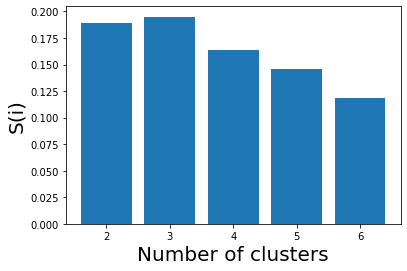

[0.18872681807399358, 0.1950761194328005, 0.1632769909335091, 0.14539390172725675, 0.11892892669258613]


In [ ]:
k = [2, 3, 4, 5, 6] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
for i in range(5):
	silhouette_scores.append(silhouette_score(d_normalized, l_algo[i])) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 
print(silhouette_scores)


###K=3 histogram

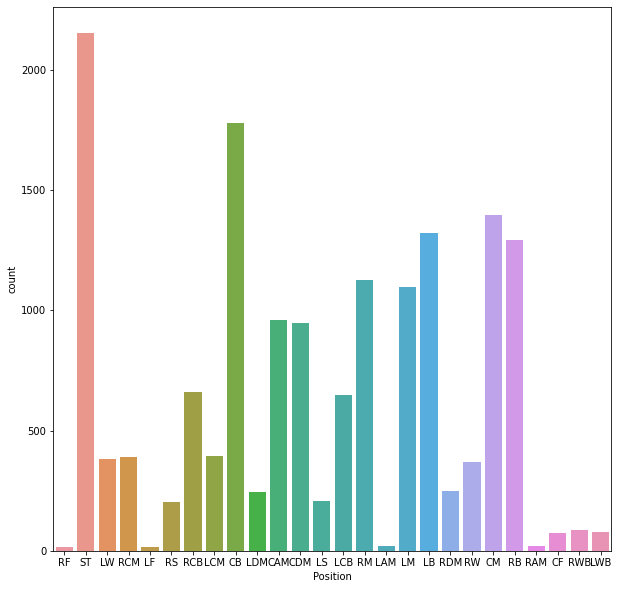

In [ ]:
# u=[]
# for i in l_algo[1]:
#   if i not in u:
#     u.append(i)
# u
d_l=dataset1
d_l['Labels']=l_algo[1]
d_l['Position']=positions
grouped = d_l.groupby(d_l.Labels)
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data =d_l, ax=ax) 
# grouped.get_group(0)

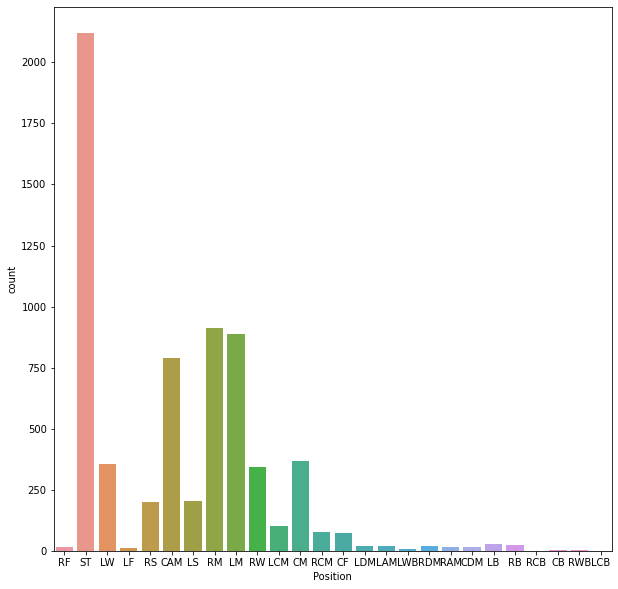

In [ ]:
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data =grouped.get_group(0), ax=ax) 
# grouped.get_group(0)

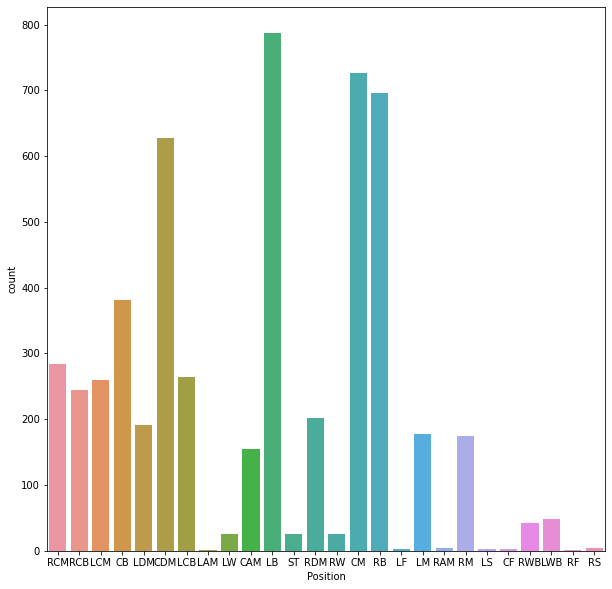

In [ ]:
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data =grouped.get_group(1), ax=ax) 
# grouped.get_group(0)

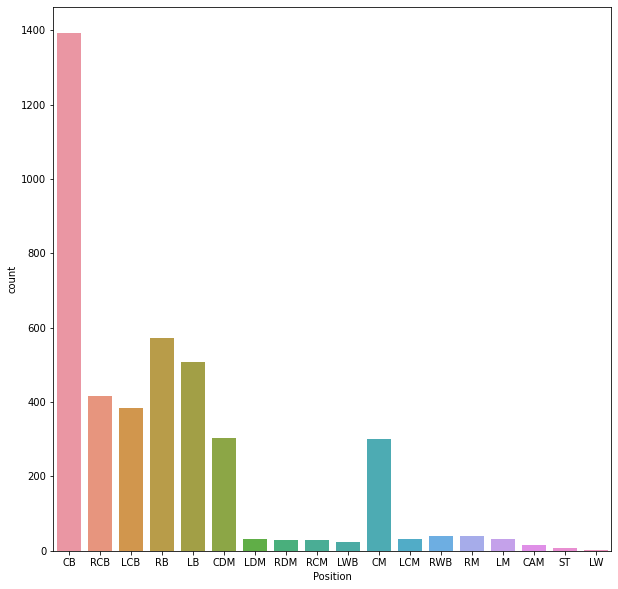

In [ ]:
fig_dims = (10, 10) #Histograms of count of players on the basis of height.
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='Position', data =grouped.get_group(2), ax=ax) 
# grouped.get_group(0)

##Task 4: DBSCAN

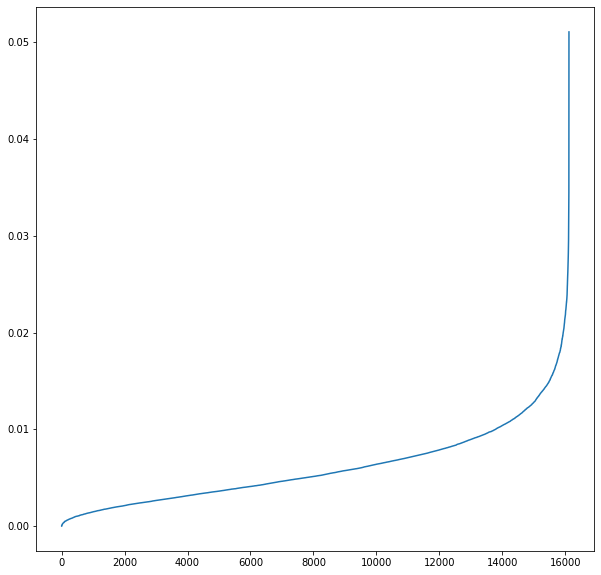

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=75)
nbrs = neigh.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize =(10, 10))
plt.plot(distances)

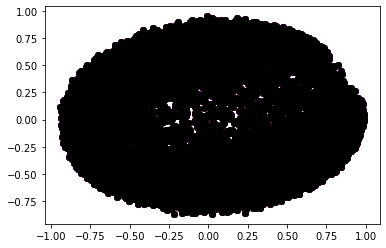

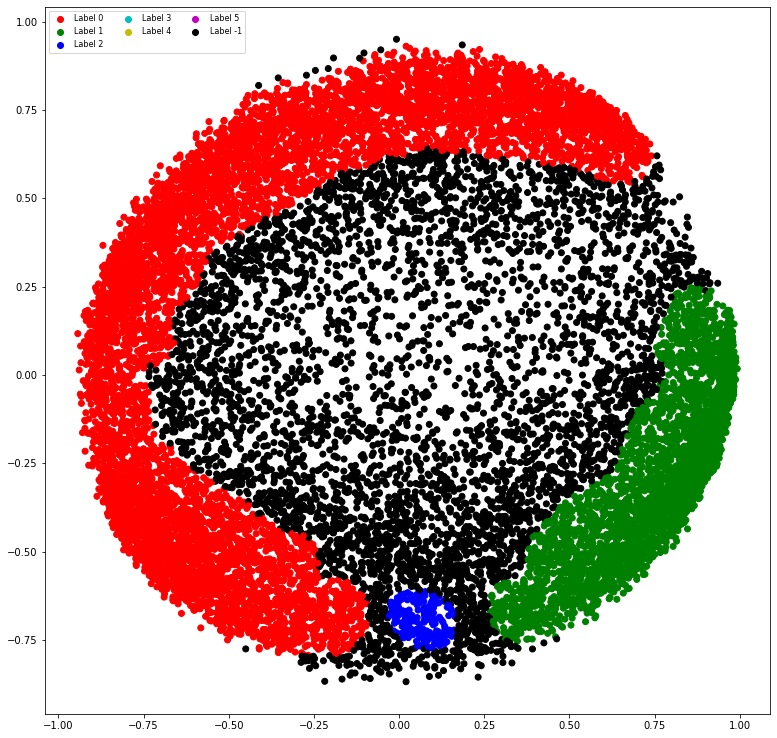

[0, -1, 2, 1]
[4706, 7881, 3339, 196]
0.04436093407254067


In [ ]:
from sklearn.cluster import DBSCAN 

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.072, min_samples = 128).fit(X_principal) 
labels = db_default.labels_ 
# Building the label to colour mapping 4
u=[]
count=[]
for i in labels:
  if i not in u:
    u.append(i)
    count.append(0)
for i in labels:
  count[i+1]=count[i+1]+1
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(13, 13)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 
print(u)
print(count)
print(silhouette_score(X_principal, labels))


In [ ]:
for i in range(2,29):
  a=(5*i)/1000
  max=0
  m=74
  for y in range(75,150):
    db_default = DBSCAN(eps =a , min_samples = y).fit(X_principal) 
    labels = db_default.labels_ 
    z=0
    for t in labels:
      if t>-1:
        z=1
        break
    if z==1:
      s=silhouette_score(X_principal, labels)
      if s>max:
        m=y
        max=s
  print(a,end=' ')
  print(m,end=' ')
  print(max)


0.01 74 0
0.015 74 0
0.02 74 0
0.025 83 0.043320909658955596
0.03 97 0.07403260622746191
0.035 115 0.09913095019930049
0.04 141 0.10138754100174331
0.045 74 0
0.05 85 0.07126880262001092
0.055 99 0.1513105634867096
0.06 118 0.16100998072697653
0.065 113 0.24318257915861932
0.07 128 0.2556848911247322
0.075 143 0.16650384691428619
0.08 143 0.1609814217585921
0.085 74 0
0.09 74 0
0.095 74 0
0.1 74 0
0.105 74 0
0.11 74 0
0.115 74 0
0.12 74 0
0.125 74 0


ValueError: ignored